<H1> Telecom Company Churn Rate - Modeling

## Introduction

In this notebook, we will apply our model for telecom churn rate to gain insights into the factors that influence customer retention and identify potential strategies for reducing churn. These models are used to analyze data, make predictions, and gain insights.

We assume that other telecom providers are setting their churn rates based on customer perceptions of these factors, reflecting a competitive market environment. This means we can draw conclusions about customer behavior and pricing strategies within the telecom sector based on our model's findings.

## Import libaries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from library.sb_utils import save_file

## Load data

In [2]:
churn_data = pd.read_csv('Data/churn_rate_cleaned.csv')

In [3]:
churn_data.head()

,gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,num AdminTickets,num TechTickets,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.50,0,0,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes


In [4]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             7043 non-null   object 
 1   Senior Citizen     7043 non-null   int64  
 2   Partner            7043 non-null   object 
 3   Dependents         7043 non-null   object 
 4   tenure             7043 non-null   int64  
 5   Phone Service      7043 non-null   object 
 6   Multiple Lines     7043 non-null   object 
 7   Internet Service   7043 non-null   object 
 8   Online Security    7043 non-null   object 
 9   Online Backup      7043 non-null   object 
 10  Device Protection  7043 non-null   object 
 11  Tech Support       7043 non-null   object 
 12  Streaming TV       7043 non-null   object 
 13  Streaming Movies   7043 non-null   object 
 14  Contract           7043 non-null   object 
 15  Paperless Billing  7043 non-null   object 
 16  Payment Method     7043 

In [5]:
churn_data.describe

<bound method NDFrame.describe of       gender  Senior Citizen Partner Dependents  tenure Phone Service  \
0     Female               0     Yes         No       1            No   
1       Male               0      No         No      34           Yes   
2       Male               0      No         No       2           Yes   
3       Male               0      No         No      45            No   
4     Female               0      No         No       2           Yes   
...      ...             ...     ...        ...     ...           ...   
7038    Male               0     Yes        Yes      24           Yes   
7039  Female               0     Yes        Yes      72           Yes   
7040  Female               0     Yes        Yes      11            No   
7041    Male               1     Yes         No       4           Yes   
7042    Male               0      No         No      66           Yes   

        Multiple Lines Internet Service Online Security Online Backup  ...  \
0     No ph

In [6]:
# Converting categorical data to numerical data
churn_data['Churn'] = churn_data['Churn'].replace({'Yes': 1, 'No': 0})

In [7]:
churn_data = churn_data.dropna(subset=['Churn', 'Monthly Charges', 'Total Charges'])

In [8]:
#selecting numerical data
numerical_churn = churn_data.select_dtypes(include=['number'])

In [9]:
numerical_churn

,Senior Citizen,tenure,Monthly Charges,Total Charges,num AdminTickets,num TechTickets,Churn
0,0,1,29.85,29.85,0,0,0
1,0,34,56.95,1889.50,0,0,0
2,0,2,53.85,108.15,0,0,1
3,0,45,42.30,1840.75,0,3,0
4,0,2,70.70,151.65,0,0,1
...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,0,0
7039,0,72,103.20,7362.90,0,5,0
7040,0,11,29.60,346.45,0,0,0
7041,1,4,74.40,306.60,0,0,1


## K-Nearest Neigbors

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score  # Import accuracy_score

y = numerical_churn["Churn"].values
X = numerical_churn[["tenure", "Monthly Charges"]].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier with the desired number of neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the data
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Optionally, evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.76


### ROC Curve

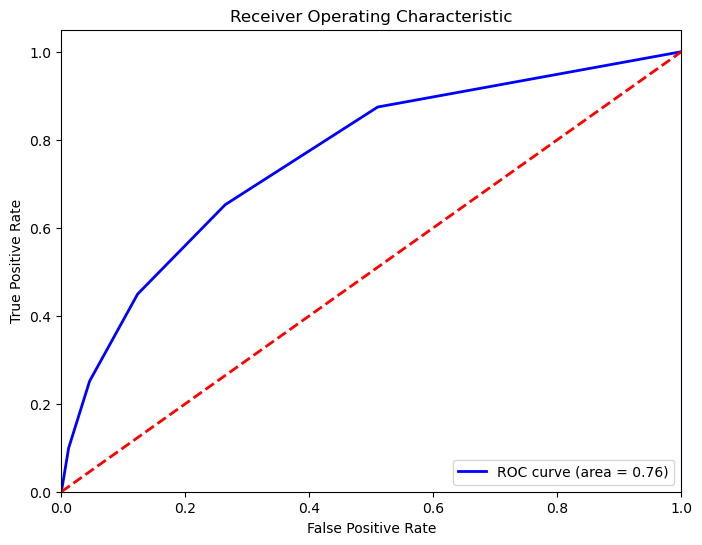

In [11]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities
y_prob = knn.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

This plot visualizes the model's performance across different classification thresholds.

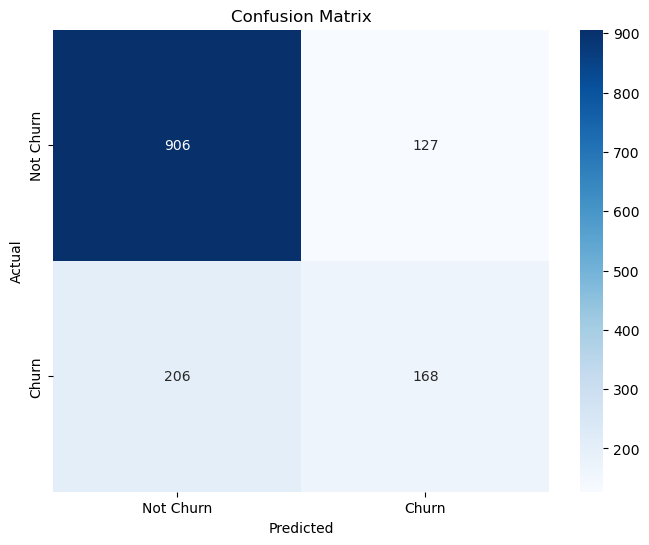

In [12]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

This heatmap displays counts of actual versus predicted classifications.

## Linear Regression

In [20]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

y = numerical_churn["Total Charges"].values
X = numerical_churn["tenure"].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

Predictions: [4433.24050483 1257.66994559], Actual Values: [1501.75  465.85]


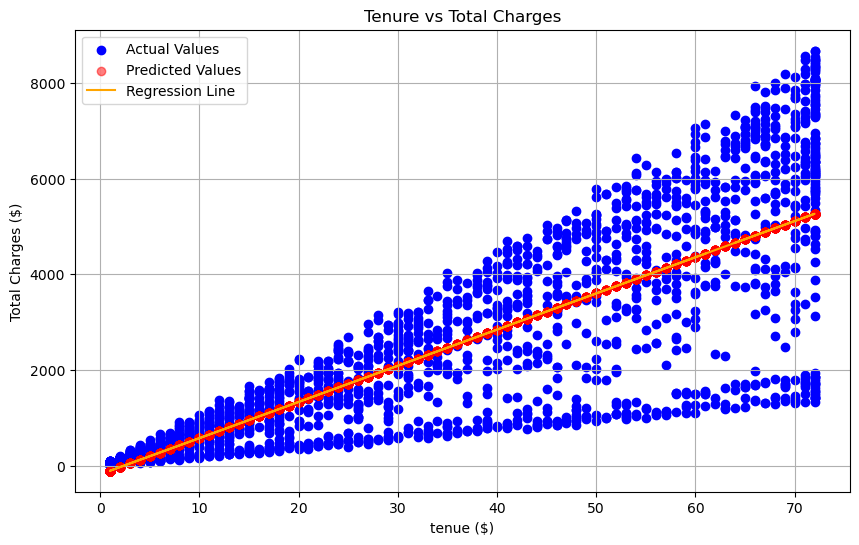

In [21]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Values')  # Scatter plot for actual values
plt.scatter(X_test, y_pred, color='red', label='Predicted Values', alpha=0.5)  # Scatter plot for predicted values

# Create a line for the regression
plt.plot(X_test, y_pred, color='orange', label='Regression Line')

# Labeling the axes
plt.xlabel("tenue ($)")
plt.ylabel("Total Charges ($)")
plt.title("Tenure vs Total Charges")
plt.legend()
plt.grid(True)
plt.show()

In [22]:
# Regression performance
# Import mean_squared_error
from sklearn.metrics import mean_squared_error

# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.6908213475789509
RMSE: 1266.5826559770207


This model show the relationship between a dependent variable (Total Charges) and the independent variables (tenure)